Data Information:-
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Attribute information :-
Pregnancies - Number of times pregnant
Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure - Diastolic blood pressure (mm Hg)
SkinThickness - Triceps skin fold thickness (mm)
Insulin - 2-Hour serum insulin (mu U/ml)
BMI - Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction - Diabetes pedigree function
Age - Age (years)
Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0




In [3]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [5]:
names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
data=pd.read_csv('pima-indians-diabetes.data',names=names)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.shape

(768, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#no missing value

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
#mean imputations for zero values

In [14]:
data['Glucose'].replace(0,data['Glucose'].mean(),inplace=True)
data['BloodPressure'].replace(0,data['BloodPressure'].mean(),inplace=True)
data['Insulin'].replace(0,data['Insulin'].mean(),inplace=True)
data['SkinThickness'].replace(0,data['SkinThickness'].mean(),inplace=True)
data['BMI'].replace(0,data['BMI'].mean(),inplace=True)

In [16]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.533225
BloodPressure               0.173050
SkinThickness               1.226670
Insulin                     3.291825
BMI                         0.601103
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

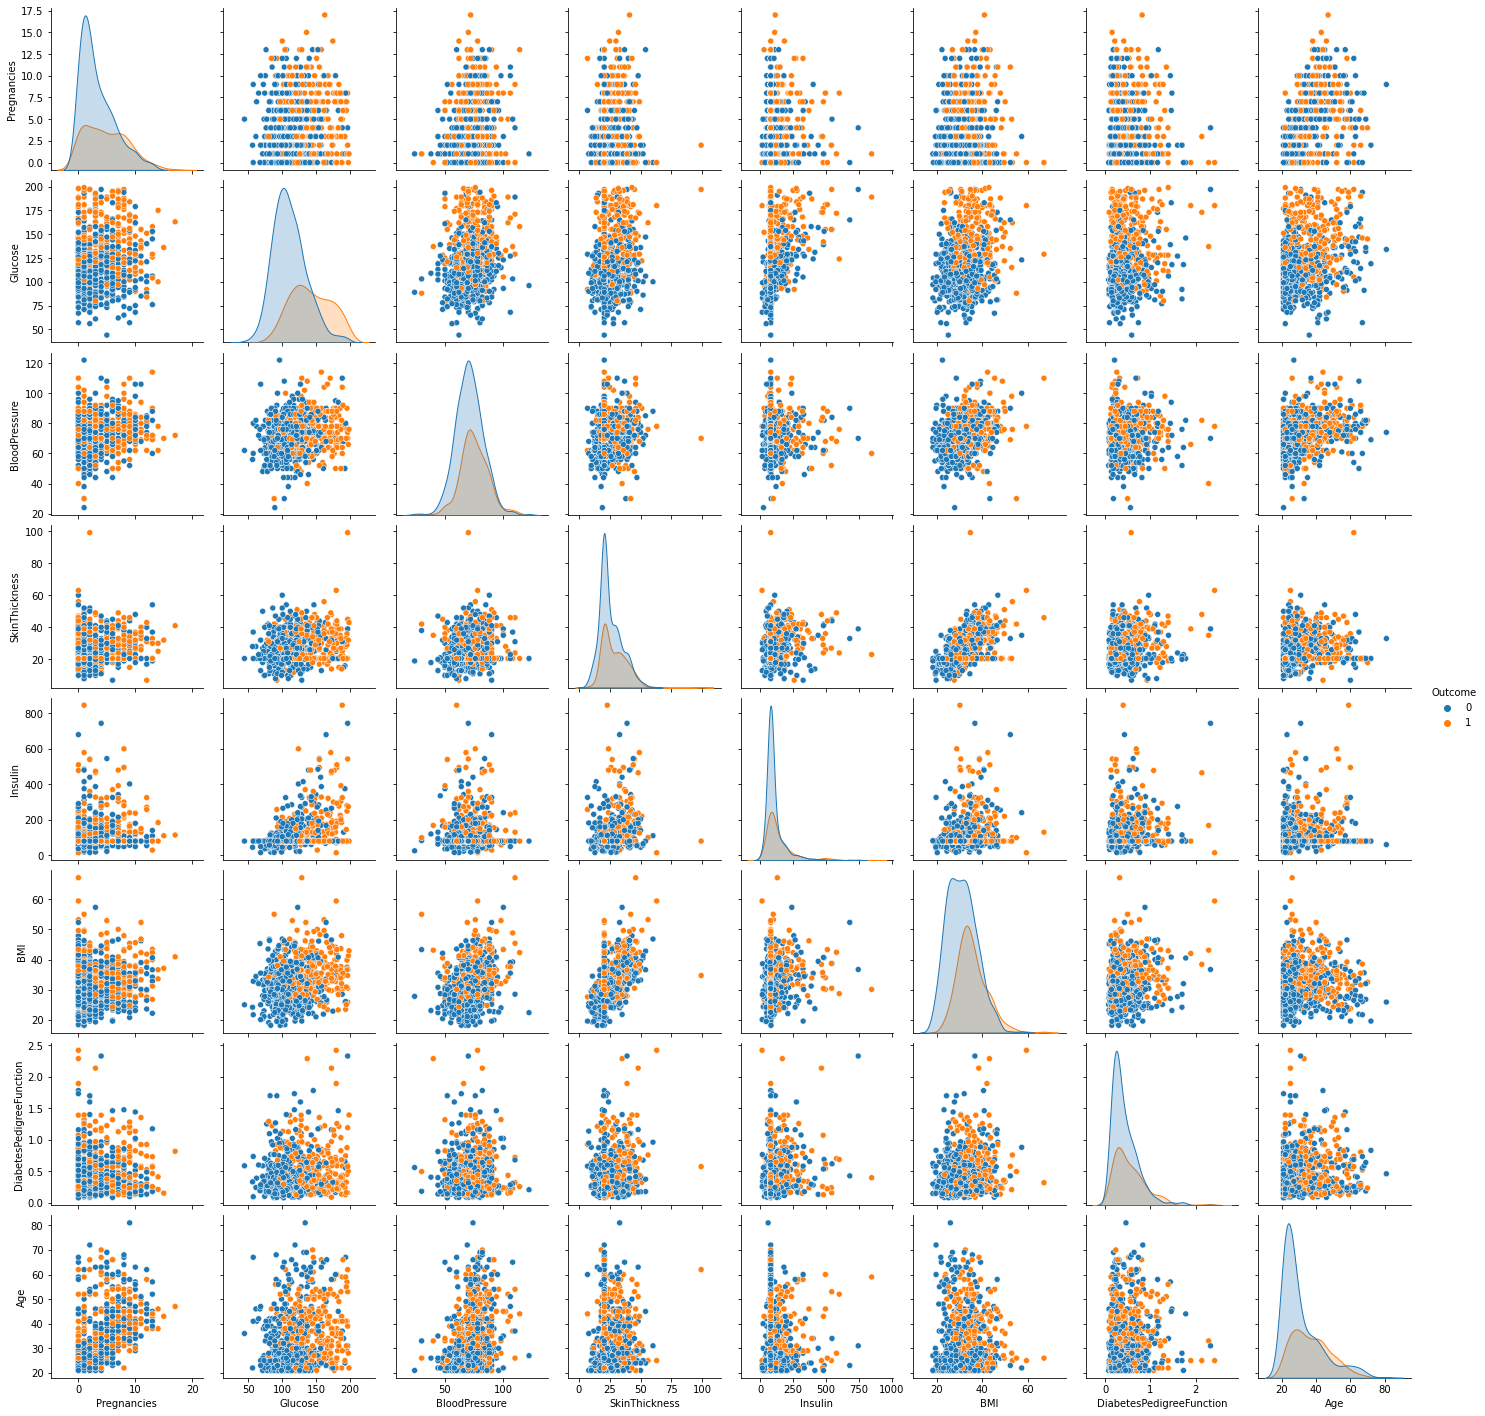

In [17]:
sns.pairplot(data,hue='Outcome')

<AxesSubplot:>

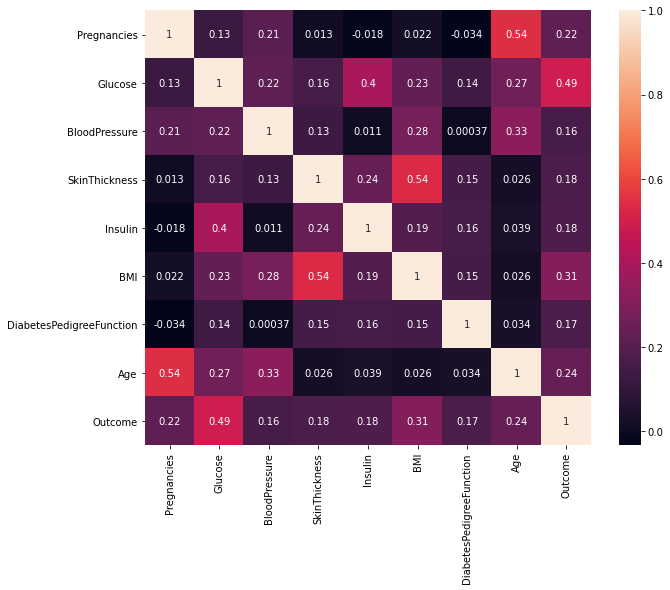

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

In [22]:
x=data.drop('Outcome',axis=1)
y=data.Outcome

In [25]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
sc=StandardScaler()
data_sc=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

# manual pca

In [28]:
#step1 coveriance mat
cov_mat=np.cov(data_sc,rowvar=False)

In [29]:
cov_mat

array([[ 1.00130378e+00,  1.28130654e-01,  2.09256130e-01,
         1.33937293e-02, -1.81058406e-02,  2.15740159e-02,
        -3.35663792e-02,  5.45050930e-01],
       [ 1.28130654e-01,  1.00130378e+00,  2.19952093e-01,
         1.60975382e-01,  3.97113746e-01,  2.31779298e-01,
         1.37285117e-01,  2.66947481e-01],
       [ 2.09256130e-01,  2.19952093e-01,  1.00130378e+00,
         1.34330038e-01,  1.09404306e-02,  2.81597872e-01,
         3.71613077e-04,  3.27166239e-01],
       [ 1.33937293e-02,  1.60975382e-01,  1.34330038e-01,
         1.00130378e+00,  2.40674267e-01,  5.36401906e-01,
         1.55163280e-01,  2.64573647e-02],
       [-1.81058406e-02,  3.97113746e-01,  1.09404306e-02,
         2.40674267e-01,  1.00130378e+00,  1.90103238e-01,
         1.58011548e-01,  3.87025622e-02],
       [ 2.15740159e-02,  2.31779298e-01,  2.81597872e-01,
         5.36401906e-01,  1.90103238e-01,  1.00130378e+00,
         1.53708138e-01,  2.57816826e-02],
       [-3.35663792e-02,  1.372851

In [30]:
#step2:eig_val,eig_vecet
eig_val,eig_vec=np.linalg.eig(cov_mat)

In [31]:
eig_val

array([2.21136191, 1.62480074, 0.39329432, 0.45803831, 0.54189381,
       0.78061344, 0.90339065, 1.09703706])

In [33]:
eig_vec

array([[-0.26863223, -0.54531225, -0.39568649, -0.48479403,  0.04241215,
        -0.45852362, -0.16381036, -0.00130036],
       [-0.43544938,  0.0169104 , -0.23903933,  0.02795566, -0.6440751 ,
         0.24884706,  0.29261777, -0.43565331],
       [-0.36649338, -0.23512384, -0.23795449,  0.02209233,  0.40394701,
         0.66664824,  0.12883232,  0.3593023 ],
       [-0.38983915,  0.35604728, -0.36650415,  0.53080757,  0.01084669,
        -0.42434464, -0.04376585,  0.35081665],
       [-0.32442186,  0.28268744,  0.11886344, -0.1194327 ,  0.61196501,
        -0.17488641,  0.30952878, -0.53436981],
       [-0.42996021,  0.31106472,  0.4925835 , -0.4966759 , -0.20715243,
        -0.04232998,  0.01108622,  0.42920931],
       [-0.19874437,  0.24107374, -0.06159241, -0.04233571,  0.05099027,
         0.24375039, -0.86937868, -0.28100647],
       [-0.34973412, -0.53432734,  0.57860532,  0.46819338, -0.00802064,
        -0.10747857, -0.131444  , -0.09642447]])

In [35]:
eig_pair=[(eig_val[i],eig_vec[:,i])for i  in range (len(eig_val))]
eig_pair.sort(reverse=True)
eig_pair

[(2.211361912117776,
  array([-0.26863223, -0.43544938, -0.36649338, -0.38983915, -0.32442186,
         -0.42996021, -0.19874437, -0.34973412])),
 (1.6248007403917653,
  array([-0.54531225,  0.0169104 , -0.23512384,  0.35604728,  0.28268744,
          0.31106472,  0.24107374, -0.53432734])),
 (1.0970370565667387,
  array([-0.00130036, -0.43565331,  0.3593023 ,  0.35081665, -0.53436981,
          0.42920931, -0.28100647, -0.09642447])),
 (0.9033906500581396,
  array([-0.16381036,  0.29261777,  0.12883232, -0.04376585,  0.30952878,
          0.01108622, -0.86937868, -0.131444  ])),
 (0.7806134439476804,
  array([-0.45852362,  0.24884706,  0.66664824, -0.42434464, -0.17488641,
         -0.04232998,  0.24375039, -0.10747857])),
 (0.5418938094201113,
  array([ 0.04241215, -0.6440751 ,  0.40394701,  0.01084669,  0.61196501,
         -0.20715243,  0.05099027, -0.00802064])),
 (0.45803831441357395,
  array([-0.48479403,  0.02795566,  0.02209233,  0.53080757, -0.1194327 ,
         -0.4966759 , 

In [36]:
eig_val=list(eig_val)
eig_val.sort(reverse=True)

In [37]:
per=[]
for i in eig_val:
    var=(i/sum(eig_val))*100
    per.append(var)
per  

[27.606031682850475,
 20.283563930346403,
 13.695107786241664,
 11.277679501865112,
 9.744962752406746,
 6.764852731530356,
 5.718023879479345,
 4.909777735279907]

In [38]:
#transform

In [40]:
np.cumsum(per)

array([ 27.60603168,  47.88959561,  61.5847034 ,  72.8623829 ,
        82.60734565,  89.37219839,  95.09022226, 100.        ])

In [41]:
#transformation

In [43]:
x_red=np.array(eig_vec.T)
x_red=np.dot(data_sc,x_red)

In [44]:
x_red

array([[-1.23120412, -0.40807855,  0.10175469, ...,  0.24721517,
        -0.74275803, -0.5037439 ],
       [ 1.40123013,  0.51136227, -0.13035195, ..., -0.35314466,
         0.04056552,  0.9186531 ],
       [-0.36121272, -0.19735394, -1.79460095, ...,  0.17828641,
        -0.53225107, -2.12123211],
       ...,
       [ 0.63676989, -0.41581189, -0.94646412, ..., -0.05131339,
         0.39137127, -0.08057927],
       [ 1.05418992,  0.15992158,  0.47916288, ...,  0.8215066 ,
         0.18012644, -0.68524839],
       [ 0.7914534 ,  0.84501235, -0.15610372, ..., -0.52858535,
         0.49543974,  1.08703589]])

In [52]:
X_pca=pd.DataFrame(x_red ,columns= ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])
X_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,-1.231204,-0.408079,0.101755,0.933464,-0.971571,0.247215,-0.742758,-0.503744
1,1.401230,0.511362,-0.130352,0.527209,-0.275767,-0.353145,0.040566,0.918653
2,-0.361213,-0.197354,-1.794601,0.649009,0.384635,0.178286,-0.532251,-2.121232
3,1.630237,0.660239,-0.345155,-0.122027,0.173782,-0.414850,0.881875,0.686923
4,-0.923215,2.824861,2.899993,1.164504,1.854250,-1.221196,-3.882363,-1.892639


# sklearn pca

In [48]:
from sklearn.decomposition  import PCA

In [49]:
pca=PCA()
pca.fit(data_sc)

PCA()

In [50]:
pca.explained_variance_

array([2.21136191, 1.62480074, 1.09703706, 0.90339065, 0.78061344,
       0.54189381, 0.45803831, 0.39329432])

In [53]:
np.cumsum(pca.explained_variance_ratio_)*100

array([0.27606032, 0.20283564, 0.13695108, 0.1127768 , 0.09744963,
       0.06764853, 0.05718024, 0.04909778])

In [54]:
pca.components_

array([[ 0.26863223,  0.43544938,  0.36649338,  0.38983915,  0.32442186,
         0.42996021,  0.19874437,  0.34973412],
       [-0.54531225,  0.0169104 , -0.23512384,  0.35604728,  0.28268744,
         0.31106472,  0.24107374, -0.53432734],
       [ 0.00130036,  0.43565331, -0.3593023 , -0.35081665,  0.53436981,
        -0.42920931,  0.28100647,  0.09642447],
       [ 0.16381036, -0.29261777, -0.12883232,  0.04376585, -0.30952878,
        -0.01108622,  0.86937868,  0.131444  ],
       [-0.45852362,  0.24884706,  0.66664824, -0.42434464, -0.17488641,
        -0.04232998,  0.24375039, -0.10747857],
       [ 0.04241215, -0.6440751 ,  0.40394701,  0.01084669,  0.61196501,
        -0.20715243,  0.05099027, -0.00802064],
       [-0.48479403,  0.02795566,  0.02209233,  0.53080757, -0.1194327 ,
        -0.4966759 , -0.04233571,  0.46819338],
       [-0.39568649, -0.23903933, -0.23795449, -0.36650415,  0.11886344,
         0.4925835 , -0.06159241,  0.57860532]])

In [56]:
eig= pd.DataFrame(pca.components_.T,index= x.columns)
eig.columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8']
eig

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
Pregnancies,0.268632,-0.545312,0.001300,0.163810,-0.458524,0.042412,-0.484794,-0.395686
Glucose,0.435449,0.016910,0.435653,-0.292618,0.248847,-0.644075,0.027956,-0.239039
BloodPressure,0.366493,-0.235124,-0.359302,-0.128832,0.666648,0.403947,0.022092,-0.237954
SkinThickness,0.389839,0.356047,-0.350817,0.043766,-0.424345,0.010847,0.530808,-0.366504
Insulin,0.324422,0.282687,0.534370,-0.309529,-0.174886,0.611965,-0.119433,0.118863
BMI,0.429960,0.311065,-0.429209,-0.011086,-0.042330,-0.207152,-0.496676,0.492584
DiabetesPedigreeFunction,0.198744,0.241074,0.281006,0.869379,0.243750,0.050990,-0.042336,-0.061592
Age,0.349734,-0.534327,0.096424,0.131444,-0.107479,-0.008021,0.468193,0.578605


# clustering

Text(0.5, 1.0, 'The Elbow Plot')

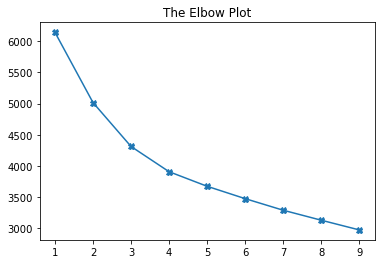

In [58]:
from sklearn.cluster import KMeans


err=[]
r=range(1,10)

for e in r :
    kmeans=KMeans(n_clusters=e)
    kmeans.fit(data_sc)
    err.append(kmeans.inertia_)
plt.plot(r,err,marker='X')
plt.title('The Elbow Plot')

In [61]:
from sklearn.metrics import silhouette_score

s=[2,3,4,5,6,7,8]

for c in s :
    modl=KMeans(n_clusters=c)
    modl.fit_predict(data_sc)
    score=silhouette_score(data_sc,modl.labels_)
    print(f'Silhouette Score for {c} cluster is :{round(score,4)}')

Silhouette Score for 2 cluster is :0.2015
Silhouette Score for 3 cluster is :0.1992
Silhouette Score for 4 cluster is :0.1892
Silhouette Score for 5 cluster is :0.1796
Silhouette Score for 6 cluster is :0.1471
Silhouette Score for 7 cluster is :0.1609
Silhouette Score for 8 cluster is :0.1496


In [65]:
kmeans=KMeans(n_clusters=2)
label_1=kmeans.fit_predict(data_sc)
df_k=data_sc.copy()
df_k['Label_1']=label_1
df_k.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label_1
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995,0
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672,1
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584,0
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549,1
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496,1


# PCA

Text(0.5, 1.0, 'The Elbow Plot')

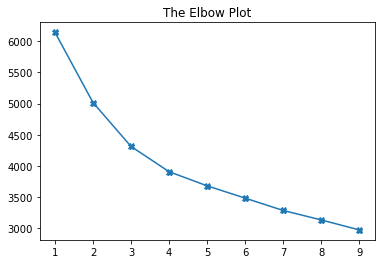

In [68]:
err=[]
r=range(1,10)

for e in r :
    kmeans=KMeans(n_clusters=e)
    kmeans.fit(X_pca)
    err.append(kmeans.inertia_)
plt.plot(r,err,marker='X')
plt.title('The Elbow Plot')

In [71]:
s=[2,3,4,5,6,7,8]

for c in s :
    modl=KMeans(n_clusters=c)
    modl.fit_predict(X_pca)
    score=silhouette_score(X_pca,modl.labels_)
    print(f'Silhouette Score for {c} cluster is :{round(score,4)}')

Silhouette Score for 2 cluster is :0.2015
Silhouette Score for 3 cluster is :0.1993
Silhouette Score for 4 cluster is :0.1875
Silhouette Score for 5 cluster is :0.184
Silhouette Score for 6 cluster is :0.1713
Silhouette Score for 7 cluster is :0.1523
Silhouette Score for 8 cluster is :0.1511


In [74]:
kmeans=KMeans(n_clusters=3)
label_2=kmeans.fit_predict(X_pca)
df_p=X_pca.copy()
df_p['Label_2']=label_2
df_p.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,Label_2
0,-1.231204,-0.408079,0.101755,0.933464,-0.971571,0.247215,-0.742758,-0.503744,1
1,1.401230,0.511362,-0.130352,0.527209,-0.275767,-0.353145,0.040566,0.918653,0
2,-0.361213,-0.197354,-1.794601,0.649009,0.384635,0.178286,-0.532251,-2.121232,1
3,1.630237,0.660239,-0.345155,-0.122027,0.173782,-0.414850,0.881875,0.686923,0
4,-0.923215,2.824861,2.899993,1.164504,1.854250,-1.221196,-3.882363,-1.892639,2


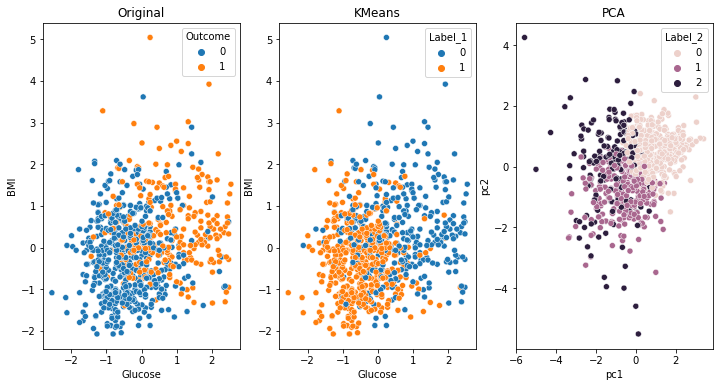

In [79]:
plt.rcParams['figure.figsize'] = (12,6)

plt.subplot(1,3,1)
plt.title('Original')
sns.scatterplot(x=data_sc['Glucose'],y=data_sc['BMI'],hue=y,data=data_sc)

plt.subplot(1,3,2)
plt.title('KMeans')
sns.scatterplot(x=df_k['Glucose'],y=df_k['BMI'],hue=df_k['Label_1'],data=df_k)

plt.subplot(1,3,3)
plt.title('PCA')
sns.scatterplot(x=df_p['pc1'],y=df_p['pc2'],hue=df_p['Label_2'],data=df_p)
plt.show()

for the original graph and the kmeans graph the datapoints are same because we used the scaled data for the modeling but as we can see that there are lots of overlaping in the data but for the PCA graph we can clearly see that the data points are almost seperated as our cluster goal.we can easily infer that the pca graph is good as the clusters are clear and not overlaped.

# Decision tree

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [82]:
x=df_p.drop('Label_2',axis=1)
y=df_p.Label_2

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

dc=DecisionTreeClassifier()
dc=dc.fit(xtrain,ytrain)
y_test_pred=dc.predict(xtest)
print('The Cassification Report for the PCA result:')
print(classification_report(ytest,y_test_pred))

The Cassification Report for the PCA result:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        65
           1       0.96      0.86      0.91        56
           2       0.85      0.88      0.87        33

    accuracy                           0.92       154
   macro avg       0.91      0.91      0.91       154
weighted avg       0.92      0.92      0.92       154



In [83]:
x=df_k.drop('Label_1',axis=1)
y=df_k.Label_1

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

dc=DecisionTreeClassifier()
dc=dc.fit(xtrain,ytrain)
y_test_pred=dc.predict(xtest)
print('The Cassification Report for the KMeans :')
print(classification_report(ytest,y_test_pred))

The Cassification Report for the KMeans :
              precision    recall  f1-score   support

           0       0.88      0.84      0.85        67
           1       0.88      0.91      0.89        87

    accuracy                           0.88       154
   macro avg       0.88      0.87      0.87       154
weighted avg       0.88      0.88      0.88       154



In [85]:
x=data_sc
y=data.Outcome

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

dc=DecisionTreeClassifier()
dc=dc.fit(xtrain,ytrain)
y_test_pred=dc.predict(xtest)
print('The Cassification Report for Original data :')
print(classification_report(ytest,y_test_pred))

The Cassification Report for Original data :
              precision    recall  f1-score   support

           0       0.76      0.85      0.81        95
           1       0.71      0.58      0.64        59

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



#According to the above reports we can see that the accuracy is way better for the PCA data rather than original data. IN our original data the accuracy is 72% but in the PCA the accuracy increases almost 96%.